## Data Collection - Goodreads list scraper

### 1. Get the book title and book id of the first 10,000 books in the Best Books Ever list on Goodreads

The function will use the [Best Books Ever]('https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1') list to get the name and id of the top 10,000 highest rated books on Goodreads. As arguments, the function accepts the base url, the first page, and the final page until which we should scrape the data. The list has 100 pages.

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [6]:
def getbooktitlesids(baseurl,firstpage,maxpage):
    booktitlesfinal,idsfinal = [],[]
    for page in range(firstpage,maxpage+1):
        res = requests.get('{}?page={}'.format(baseurl,page)).text
        soup = BeautifulSoup(res,'html5lib')
        tab = soup.find('table').find_all(class_ = 'bookTitle')
        booktitles = [span.get_text() for span in tab]
        booktitles = [title.replace('\n','').strip() for title in booktitles]
        ids = [row['href'] for row in tab]
        ids = [id.split('/')[-1] for id in ids]
        booktitlesfinal = booktitlesfinal + booktitles
        idsfinal = idsfinal + ids
    booksdf = pd.DataFrame(list(zip(booktitlesfinal,idsfinal)))
    return booksdf

Run the function

In [7]:
books = getbooktitlesids('https://www.goodreads.com/list/show/1.Best_Books_Ever',1,100)

In case we run into a gateway timeout error, append the scraped data to a dataframe, and the function again from the page at which the error occurred

In [207]:
# booksfinal = pd.DataFrame()
booksfinal = pd.concat([booksfinal,books],axis=0)
booksfinal.columns=['title','id']
booksfinal.reset_index()
booksfinal

,title,id
0,"The Hunger Games (The Hunger Games, #1)",2767052-the-hunger-games
1,Harry Potter and the Order of the Phoenix (Har...,2.Harry_Potter_and_the_Order_of_the_Phoenix
2,To Kill a Mockingbird,2657.To_Kill_a_Mockingbird
3,Pride and Prejudice,1885.Pride_and_Prejudice
4,"Twilight (The Twilight Saga, #1)",41865.Twilight
...,...,...
9995,"Coexist (Keegan's Chronicles, #1)",17256217-coexist
9996,"The Orphan Queen (The Orphan Queen, #1)",18081228-the-orphan-queen
9997,The Japanese Lover,25152052-the-japanese-lover
9998,Two By Two,40669990-two-by-two


Finally, we have all 10,000 rows

In [208]:
booksfinal.shape[0]

10000

In [209]:
booksfinal.to_csv('goodreads_bookids.csv')

In [13]:
booksfinal = pd.read_csv('goodreads_bookids.csv').iloc[:,1:]

In [14]:
booksfinal

,title,id
0,"The Hunger Games (The Hunger Games, #1)",2767052-the-hunger-games
1,Harry Potter and the Order of the Phoenix (Har...,2.Harry_Potter_and_the_Order_of_the_Phoenix
2,To Kill a Mockingbird,2657.To_Kill_a_Mockingbird
3,Pride and Prejudice,1885.Pride_and_Prejudice
4,"Twilight (The Twilight Saga, #1)",41865.Twilight
...,...,...
9995,"Coexist (Keegan's Chronicles, #1)",17256217-coexist
9996,"The Orphan Queen (The Orphan Queen, #1)",18081228-the-orphan-queen
9997,The Japanese Lover,25152052-the-japanese-lover
9998,Two By Two,40669990-two-by-two


We have the titles and ids of the first 10,000 books

### 2. Use the scraped ids and this [goodreads scraper](https://github.com/maria-antoniak/goodreads-scraper) created by [maria antoniak](https://github.com/maria-antoniak) on github to get the book metadata

I used the scraper mentioned above to get the book metadata. Since it takes quite a bit of time to get all the data, I scraped only the first 1000 books (which took about two days!)

In [16]:
from PIL import Image

The goodreads scraper in action

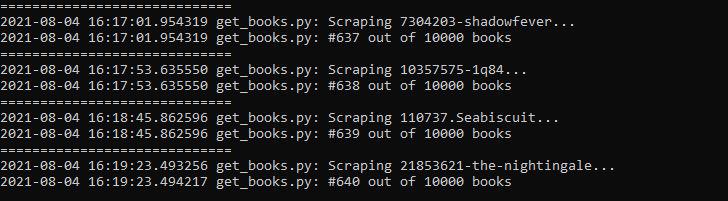

In [19]:
im = Image.open('scraperinaction.PNG')
im

In [3]:
top1000 = pd.read_csv('goodreads_top1000.csv')
top1000.head()

,book_id_title,book_id,book_title,book_series,book_series_uri,isbn,isbn13,year_first_published,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution
0,1.Harry_Potter_and_the_Half_Blood_Prince,1,Harry Potter and the Half-Blood Prince,Harry Potter #6,/series/45175-harry-potter,747581088,9.78075E+12,2005.0,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...","{'to-read': 364165, 'fantasy': 50816, 'favorit...","{'Books': 246, 'Best': 491, 'The': 8907, ""Coul...",2650467,43450,4.57,"{'5 Stars': 1794068, '4 Stars': 630873, '3 Sta..."
1,10025305-clockwork-prince,10025305,Clockwork Prince,The Infernal Devices #2,/series/54144-the-infernal-devices,8408102338,9.78841E+12,NaN,Cassandra Clare,498,"['Fantasy', 'Young Adult', 'Romance', 'Fantasy...","{'to-read': 219672, 'favorites': 12675, 'fanta...","{'YA': 277, 'Books': 288, ""Can't"": 74, 'Best':...",488260,25729,4.42,"{'5 Stars': 292230, '4 Stars': 132295, '3 Star..."
2,100915.The_Lion_the_Witch_and_the_Wardrobe,100915,"The Lion, the Witch and the Wardrobe",The Chronicles of Narnia (Publication Order,/series/49073-the-chronicles-of-narnia-publica...,64471047,9.78006E+12,1950.0,C.S. Lewis,206,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","{'to-read': 477766, 'fantasy': 26869, 'current...","{'Books': 58, 'Best': 103, 'The': 47, 'Favorit...",2298944,24386,4.22,"{'5 Stars': 1111315, '4 Stars': 721815, '3 Sta..."
3,101299.The_Reader,101299,The Reader,NaN,NaN,3257229534,9.78326E+12,1995.0,Bernhard Schlink,216,"['Fiction', 'Historical > Historical Fiction',...","{'to-read': 65493, 'fiction': 2823, 'currently...","{'What': 73, 'Best': 22, 'Books': 69522, 'I': ...",180371,10743,3.77,"{'5 Stars': 43720, '4 Stars': 71143, '3 Stars'..."
4,10140661-gabriel-s-inferno,10140661,Gabriel's Inferno,Gabriel's Inferno #1,/series/80574-gabriel-s-inferno,isbn not found,9.78841E+12,2011.0,Sylvain Reynard,506,"['Romance', 'Romance > Contemporary Romance', ...","{'to-read': 90358, 'currently-reading': 3066, ...","{'Best': 335, 'Controlling/Sexy/Possessive': 6...",149866,8440,4.00,"{'5 Stars': 66101, '4 Stars': 41427, '3 Stars'..."


In [4]:
top1000.shape

(1000, 17)

Finally, we have all the data we need - the metadata of the top 1000 books from Goodreads. Let's move on to EDA in the next notebook

In [6]:
### END